# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import cross_val_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
print(df.dtypes)

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


In [5]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


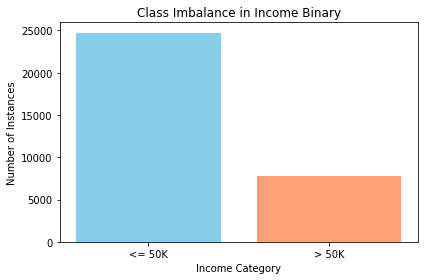

In [32]:
# Count the occurrences of each class
class_counts = df['income_binary'].value_counts()

# Plotting the class imbalance
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'lightsalmon'])
plt.xlabel('Income Category')
plt.ylabel('Number of Instances')
plt.title('Class Imbalance in Income Binary')
plt.xticks(class_counts.index, ['<= 50K', '> 50K'])
plt.tight_layout()

plt.show()

In [29]:
num_instances_greater_than_50k = df[df['income_binary'] == '>50K'].shape[0]

num_instances_greater_than_50k

7841

In [6]:
nan_count = df.isna().sum()# YOUR CODE HERE
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [7]:
#replace all missing values with its own category "Unknown"

df["workclass"].fillna("Unknown", inplace=True)
df["occupation"].fillna("Unknown", inplace=True)
df["native-country"].fillna("Unknown", inplace=True)

In [8]:
nan_detected = nan_count != 0 # YOUR CODE HERE
nan_detected

age                True
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country     True
income_binary     False
dtype: bool

In [9]:
to_impute = ["age", "hours-per-week"]

In [10]:
#replace missing values in columns of type int with mean values
for column in to_impute:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

In [11]:
#search for uniqueness in native-country (possible that there would be too many unique values)
unique_count = df["native-country"].nunique()
unique_count

42

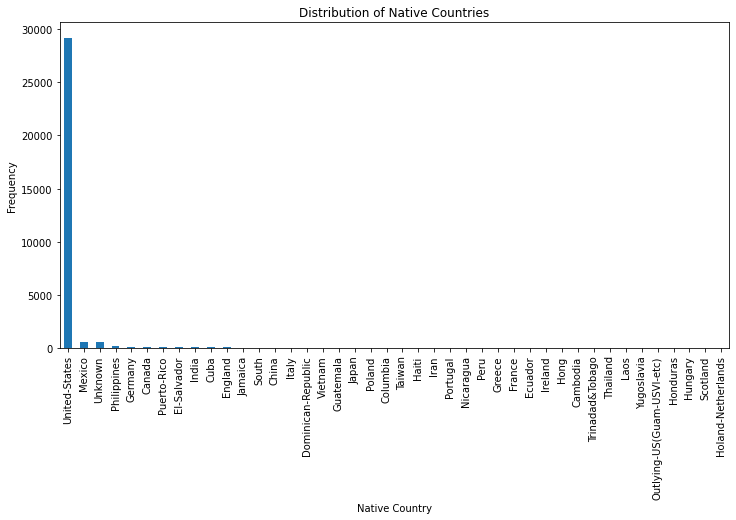

In [12]:
#count the frequency of each native country
country_counts = df['native-country'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Native Country')
plt.ylabel('Frequency')
plt.title('Distribution of Native Countries')
plt.show()

The graph above shows there is an imbalance, highly towards those whose native-country is the US
However there are only 42 unique values.

In [13]:
#drop irrelevant columns
df.drop(columns="fnlwgt")
df.drop(columns="education-num")

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40.0,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K
32558,58.0,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22.0,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K


In [14]:
#use one-hot encoding to convert my categorical column values into numerical values
cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
df_encode = pd.get_dummies(df, columns=cat_col)
df_encode.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516,13,2174,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,83311,13,0,0,13.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,215646,9,0,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53.0,234721,7,0,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28.0,338409,13,0,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [15]:
# YOUR CODE HERE
y = df_encode["income_binary"] #label
X = df_encode.drop(columns="income_binary", axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1234)

In [17]:
#label encoding
label_encode = LabelEncoder()
y_train_encoded = label_encode.fit_transform(y_train)
y_test_encoded = label_encode.fit_transform(y_test)

In [18]:
X_train.head()
y_train_encoded

array([0, 0, 1, ..., 1, 0, 1])

In [19]:
# # help identify the better num for n_estimators
# estimator_range = [50, 100, 300, 500]
# for n_estimators in estimator_range:
#     model = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators)
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     print(f"Estimators: {n_estimators}, Mean Accuracy: {scores.mean():.4f}")

In [20]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=300)
rf_model.fit(X_train, y_train_encoded)
rf_predictions = list(rf_model.predict_proba(X_test)[:,1])

In [21]:
fpr, tpr, thresholds = roc_curve(y_test_encoded, rf_predictions)
roc_auc = auc(fpr, tpr)
print("AUC of the RF model with 300 estimators is {:.3f}".format(roc_auc))

AUC of the RF model with 300 estimators is 0.894


In [22]:
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred)
f1

0.6482817140432754

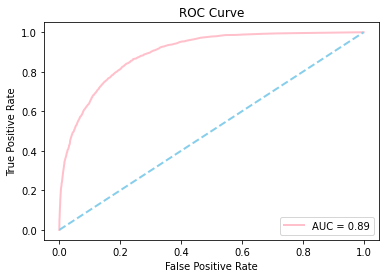

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

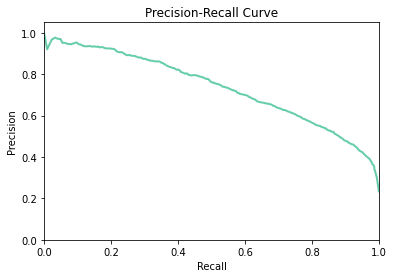

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_encoded, rf_predictions)

plt.figure()
plt.plot(recall, precision, color='mediumaquamarine', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

## Optimizing my model

In [37]:
#downsampling in order to fix class imbalance

major_class = df_encode[df_encode['income_binary'] == '<=50K']
minor_class = df_encode[df_encode['income_binary'] == '>50K']

down_major = major_class.sample(n=len(minor_class), random_state=1234)

down_df = pd.concat([down_major, minor_class])

down_df = down_data.sample(frac=1, random_state=1234)

print(down_df['income_binary'].value_counts())

>50K     7841
<=50K    7841
Name: income_binary, dtype: int64


In [38]:
down_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
4358,40.0,26358,12,0,0,40.0,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26899,38.0,312232,10,0,0,50.0,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3499,26.0,139098,14,5013,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25447,30.0,63861,12,0,0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31516,42.0,194417,10,0,0,40.0,>50K,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,54.0,256908,13,0,0,25.0,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31782,38.0,238980,10,0,0,60.0,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3133,45.0,67716,9,10520,0,48.0,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25335,46.0,216414,14,0,1977,60.0,>50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
y = down_df["income_binary"] #label
X = down_df.drop(columns="income_binary", axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1234)

In [41]:
#label encoding
label_encode = LabelEncoder()
y_train_encoded = label_encode.fit_transform(y_train)
y_test_encoded = label_encode.fit_transform(y_test)

In [42]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=300)
rf_model.fit(X_train, y_train_encoded)
rf_predictions = list(rf_model.predict_proba(X_test)[:,1])

In [43]:
fpr, tpr, thresholds = roc_curve(y_test_encoded, rf_predictions)
roc_auc = auc(fpr, tpr)
print("AUC of the RF model with 300 estimators is {:.3f}".format(roc_auc))

AUC of the RF model with 300 estimators is 0.908


In [44]:
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred)
f1

0.828907435508346

As seen above, compared to the previous results, the model has improved :)

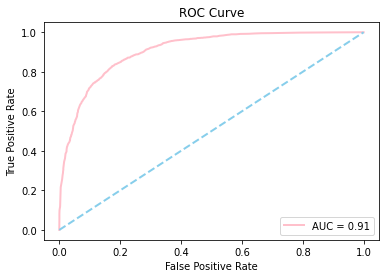

In [45]:
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

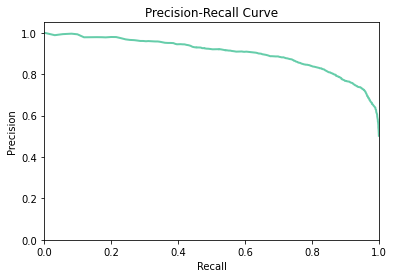

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_encoded, rf_predictions)

plt.figure()
plt.plot(recall, precision, color='mediumaquamarine', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [52]:
#grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300],
    'max_depth': [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [53]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=200, min_samples_split=10, max_depth=None)
rf_model.fit(X_train, y_train_encoded)
rf_predictions = list(rf_model.predict_proba(X_test)[:,1])

In [54]:
fpr, tpr, thresholds = roc_curve(y_test_encoded, rf_predictions)
roc_auc = auc(fpr, tpr)
print("AUC of the RF model with 300 estimators is {:.3f}".format(roc_auc))

AUC of the RF model with 300 estimators is 0.915


In [55]:
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred)
f1

0.8392924350771547

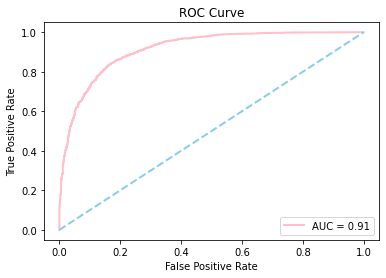

In [56]:
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

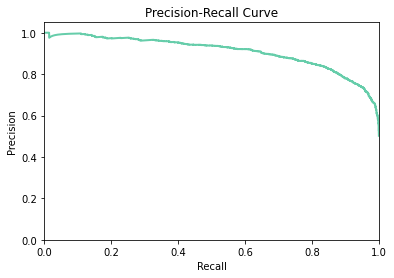

In [57]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_encoded, rf_predictions)

plt.figure()
plt.plot(recall, precision, color='mediumaquamarine', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()